In [1]:
# import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Extracting Data from a Single Excel File Containing Multiple Stock Index Information
def data_cleaning(original_file_name, saved_file_name):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'feature_data', 'unfinish data')
    original_file = pd.read_excel(os.path.join(index_data_dir, original_file_name))

    # Secid: [RUT:102434 DJX: 102456 SPX: 108105]
    filtered_data = original_file[original_file['Security ID'] == 102434]
    filtered_data['The Date of this Option Price'] = filtered_data['The Date of this Option Price'].dt.strftime('%-d/%-m/%Y')

    # Define the path for the new Excel file
    output_excel_path = os.path.join(index_data_dir, saved_file_name)

    # Write the filtered data to a new Excel file
    filtered_data.to_excel(output_excel_path, index=False)


In [3]:
#data_cleaning('OptionMetrics - Standardized Options.xlsx', 'OptionMetrics - RUT Standardized Options.xlsx')



In [4]:
def data_clearning_for_option(original_file_name, saved_file_name):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'feature_data', 'unfinish data')
    original_file = pd.read_excel(os.path.join(index_data_dir, original_file_name))
    
    # C=Call, P=Put ID
    filtered_data = original_file[original_file['C=Call, P=Put'] == 'P']

    # Define the path for the new Excel file
    output_excel_path = os.path.join(index_data_dir, saved_file_name)
    
    # Write the filtered data to a new Excel file
    filtered_data.to_excel(output_excel_path, index=False)

In [5]:
#data_clearning_for_option('OptionMetrics - RUT Standardized Options.xlsx', 'OptionMetrics - RUT Standardized Options (PUT).xlsx')



In [6]:
# Avoid data leakage to test data
# Impute missing data in train and test datasets using KNNImputer.
def impute_data(train, test):
    imputer = KNNImputer(n_neighbors=5)

    # Fit the imputer on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train_imputed = imputer.transform(train)
    test_imputed = imputer.transform(test)

    return train_imputed, test_imputed

# get the feature data from data folder
def load_feature_data(start_date, test_start_dates, end_date, rebal_period):
    # Load index data, impute missing values and return train and test datasets
    index_data_dir = os.path.join(os.getcwd(), 'data', 'feature_data')
    result_train_df = pd.DataFrame()
    result_test_df = pd.DataFrame()
    
    index_data_name_file = {
        'CBOE DJIA Volatility Index':'CBOE DJIA Volatility Index - Close.xlsx',
        'CBOE NASDAQ Volatility Index': 'CBOE NASDAQ Volatility Index - Close.xlsx',
        'CBOE S&P100 Volatility Index': 'CBOE S&P100 Volatility Index - Close.xlsx',
        'CBOE S&P500 Volatility Index': 'CBOE S&P500 Volatility Index - Close.xlsx',
        'OptionMetrics - DJI Historical Volatility': 'OptionMetrics - DJI Historical Volatility.xlsx',
        'OptionMetrics - Russell 2000 Historical Volatility': 'OptionMetrics - Russell 2000 Historical Volatility.xlsx',
        'OptionMetrics - SPX Historical Volatility': 'OptionMetrics - SPX Historical Volatility.xlsx',
        'OptionMetrics - DJX  Index Dividend Yield': 'OptionMetrics - DJX  Index Dividend Yield.xlsx',
        'OptionMetrics - Russell 2000  Index Dividend Yield': 'OptionMetrics - Russell 2000  Index Dividend Yield.xlsx',
        'OptionMetrics - SPX  Index Dividend Yield': 'OptionMetrics - SPX  Index Dividend Yield.xlsx',
        'OptionMetrics - Russel 2000 The total contract open interest': 'OptionMetrics - Russel 2000 The total contract open interest.xlsx',
        'OptionMetrics - Russel 2000 Option Volume': 'OptionMetrics - Russel 2000 Option Volume.xlsx',
        'OptionMetrics - DJX Option Volume': 'OptionMetrics - DJX Option Volume.xlsx',
        'OptionMetrics - DJX The total contract open interest': 'OptionMetrics - DJX The total contract open interest.xlsx',
        'OptionMetrics - SPX Option Volume': 'OptionMetrics - SPX Option Volume.xlsx',
        'OptionMetrics - SPX The total contract open interest': 'OptionMetrics - SPX The total contract open interest.xlsx',
        'OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (CALL)': 'OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (CALL).xlsx',
        'OptionMetrics - DJX Delta of the Option(CALL)': 'OptionMetrics - DJX Delta of the Option(CALL).xlsx',
        'OptionMetrics - DJX Implied Volatility of the Option(CALL)': 'OptionMetrics - DJX Implied Volatility of the Option(CALL).xlsx',
        'OptionMetrics - DJX Interpolated Premium for the Option(CALL)': 'OptionMetrics - DJX Interpolated Premium for the Option(CALL).xlsx',
        'OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price(CALL)': 'OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price(CALL).xlsx',
        'OptionMetrics - DJX Theta of the Option(CALL)': 'OptionMetrics - DJX Theta of the Option(CALL).xlsx',
        'OptionMetrics - DJX VegaKappa of the Option(CALL)': 'OptionMetrics - DJX VegaKappa of the Option(CALL).xlsx',
        'OptionMetrics - Zero Coupon Yield Curve': 'OptionMetrics - Zero Coupon Yield Curve.xlsx',
        'OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (PUT).xlsx': 'OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (PUT).xlsx',
        'OptionMetrics - DJX Delta of the Option (PUT)': 'OptionMetrics - DJX Delta of the Option (PUT).xlsx',
        'OptionMetrics - DJX Gamma of the Option (PUT)': 'OptionMetrics - DJX Gamma of the Option (PUT).xlsx',
        'OptionMetrics - DJX Interpolated Premium for the Option (PUT)': 'OptionMetrics - DJX Interpolated Premium for the Option (PUT).xlsx',
        'OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price (PUT)': 'OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price (PUT).xlsx',
        'OptionMetrics - DJX Theta of the Option (PUT)': 'OptionMetrics - DJX Theta of the Option (PUT).xlsx',
        'OptionMetrics - DJX VegaKappa of the Option (PUT)': 'OptionMetrics - DJX VegaKappa of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (CALL)': 'OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (CALL).xlsx',
        'OptionMetrics - Russell 2000 Delta of the Option(CALL)': 'OptionMetrics - Russell 2000 Delta of the Option(CALL).xlsx',
        'OptionMetrics - Russell 2000 Gamma of the Option(CALL)': 'OptionMetrics - Russell 2000 Gamma of the Option(CALL).xlsx',
        'OptionMetrics - Russell 2000 Implied Volatility of the Option(CALL)': 'OptionMetrics - Russell 2000 Implied Volatility of the Option(CALL).xlsx',
        'OptionMetrics - Russell 2000 Interpolated Premium for the Option (CALL)': 'OptionMetrics - Russell 2000 Interpolated Premium for the Option (CALL).xlsx',
        'OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (CALL)': 'OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (CALL).xlsx',
        'OptionMetrics - Russell 2000 Theta of the Option(CALL)': 'OptionMetrics - Russell 2000 Theta of the Option(CALL).xlsx',
        'OptionMetrics - Russell 2000 VegaKappa of the Option(CALL)': 'OptionMetrics - Russell 2000 VegaKappa of the Option(CALL).xlsx',
        'OptionMetrics - Russell 2000 VegaKappa of the Option (PUT)': 'OptionMetrics - Russell 2000 VegaKappa of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Theta of the Option (PUT)': 'OptionMetrics - Russell 2000 Theta of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Gamma of the Option (PUT)': 'OptionMetrics - Russell 2000 Gamma of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Delta of the Option (PUT)': 'OptionMetrics - Russell 2000 Delta of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Implied Volatility of the Option (PUT)': 'OptionMetrics - Russell 2000 Implied Volatility of the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Interpolated Premium for the Option (PUT)': 'OptionMetrics - Russell 2000 Interpolated Premium for the Option (PUT).xlsx',
        'OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (PUT)': 'OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (PUT).xlsx',
        'OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (PUT)': 'OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (PUT).xlsx',
        'OptionMetrics - SPX Calculated Price for the Underlying Security on the Exp. Date (CALL)': 'OptionMetrics - SPX Calculated Price for the Underlying Security on the Exp. Date (CALL).xlsx',
        'OptionMetrics - SPX Delta of the Option (CALL)': 'OptionMetrics - SPX Delta of the Option (CALL).xlsx',
        'OptionMetrics - SPX Gamma of the Option (CALL)': 'OptionMetrics - SPX Gamma of the Option (CALL).xlsx',
        'OptionMetrics - SPX Implied Volatility of the Option (CALL)': 'OptionMetrics - SPX Implied Volatility of the Option (CALL).xlsx',
        'OptionMetrics - SPX Interpolated Premium for the Option (CALL)': 'OptionMetrics - SPX Interpolated Premium for the Option (CALL).xlsx',
        'OptionMetrics - SPX Standardized Options (PUT)': 'OptionMetrics - SPX Standardized Options (PUT).xlsx',
        'OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)': 'OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL).xlsx',
        'OptionMetrics - SPX Theta of the Option (CALL)': 'OptionMetrics - SPX Theta of the Option (CALL).xlsx',
        'OptionMetrics - SPX VegaKappa of the Option (PUT)': 'OptionMetrics - SPX VegaKappa of the Option (PUT).xlsx'
        
        
    }
    
    for ind_name in index_data_name_file.keys():
        try:
            input = pd.read_excel(os.path.join(index_data_dir, index_data_name_file[ind_name]), index_col='Date')
            # Ensure that the index is a DatetimeIndex
            input.index = pd.to_datetime(input.index)
            input = input.sort_index(ascending=False)

            # Calculate monthly percentage changes to enhance the stationarity of the data
            # Fill the first with 0
            index_df = input.iloc[:, 0].resample(rebal_period).first().pct_change().fillna(0)

             # Split the data into train and test based on the provided dates
            train_data = index_df.loc[start_date:test_start_dates]
            test_data = index_df.loc[test_start_dates:end_date]

            # Handle infinite values
            inf_indices_train = np.where(np.isinf(train_data))[0]
            inf_indices_test = np.where(np.isinf(test_data))[0]

            train_data[inf_indices_train] = np.nan
            test_data[inf_indices_test] = np.nan

            train_imputed, test_imputed = impute_data(train_data.values.reshape(-1, 1), test_data.values.reshape(-1, 1))

            # Convert back to Series
            train_imputed_series = pd.Series(train_imputed.flatten(), index=train_data.index)
            test_imputed_series = pd.Series(test_imputed.flatten(), index=test_data.index)

            # Rename the series for clarity
            train_imputed_series.rename(ind_name, inplace=True)
            test_imputed_series.rename(ind_name, inplace=True)

            result_train_df = pd.concat([result_train_df, train_imputed_series], axis=1)
            result_test_df = pd.concat([result_test_df, test_imputed_series], axis=1)
            
        except Exception as e:
            print(f"Error processing file: {index_data_name_file[ind_name]}")
            print(str(e))
            continue
    
    result_train_df.index = pd.to_datetime(result_train_df.index)
    result_test_df.index = pd.to_datetime(result_test_df.index)

    return result_train_df, result_test_df

In [7]:
# Define general parameters
train_start_date = '2007-01-01'
test_start_date = '2017-01-01'
test_end_date = '2022-12-31'
rebal_period = '1M'
train_data, test_data = load_feature_data(train_start_date, test_start_date, test_end_date, rebal_period)

In [8]:
train_data

,CBOE DJIA Volatility Index,CBOE NASDAQ Volatility Index,CBOE S&P100 Volatility Index,CBOE S&P500 Volatility Index,OptionMetrics - DJI Historical Volatility,OptionMetrics - Russell 2000 Historical Volatility,OptionMetrics - SPX Historical Volatility,OptionMetrics - DJX Index Dividend Yield,OptionMetrics - Russell 2000 Index Dividend Yield,OptionMetrics - SPX Index Dividend Yield,...,OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (PUT),OptionMetrics - SPX Calculated Price for the Underlying Security on the Exp. Date (CALL),OptionMetrics - SPX Delta of the Option (CALL),OptionMetrics - SPX Gamma of the Option (CALL),OptionMetrics - SPX Implied Volatility of the Option (CALL),OptionMetrics - SPX Interpolated Premium for the Option (CALL),OptionMetrics - SPX Standardized Options (PUT),"OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)",OptionMetrics - SPX Theta of the Option (CALL),OptionMetrics - SPX VegaKappa of the Option (PUT)
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-28,-0.167095,-0.022286,-0.139153,-0.143688,0.056294,0.347163,0.000247,0.002343,0.007878,0.000487,...,0.032320,-0.000182,-0.003880,0.914362,-0.095742,-0.476461,-0.000182,-0.000182,0.454189,-0.421005
2007-03-31,0.543210,0.257160,0.627510,0.534433,0.657119,0.121434,0.655073,0.006376,-0.002570,0.010648,...,-0.013289,0.038375,0.036257,-0.936286,0.796147,13.402996,0.038375,0.038375,-0.732992,6.990145
2007-04-30,-0.111333,-0.135286,-0.149291,-0.081542,-0.565452,-0.259023,-0.539878,0.000283,0.011641,-0.001090,...,0.002259,-0.013474,-0.002157,0.198593,-0.026544,-0.147340,-0.013474,-0.013474,0.110246,-0.123100
2007-05-31,-0.065266,-0.089247,-0.067440,-0.070200,0.153970,0.137907,-0.007005,0.002195,-0.001225,0.002621,...,-0.059206,-0.005549,-0.000423,0.011742,-0.005233,-0.011346,-0.005549,-0.005549,-0.004676,-0.006355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,-0.119215,-0.137255,-0.198561,-0.157752,0.011392,0.092707,-0.015551,-0.003238,-0.001984,0.003680,...,-0.015997,-0.009976,-0.008527,0.664702,0.053366,-0.397662,-0.009976,-0.009976,0.852705,-0.428098
2016-09-30,0.023089,0.059917,0.108618,0.083601,0.264204,0.276138,0.288959,-0.076863,-0.012372,-0.088924,...,-0.095365,-0.037989,0.019170,-0.576113,-0.003958,1.344289,-0.037989,-0.037989,-0.622099,1.352041
2016-10-31,0.101167,0.030539,0.090688,0.006677,0.078827,0.123927,0.089788,0.001985,-0.001995,0.002877,...,0.016712,-0.003560,0.014153,-0.350330,-0.038693,0.521468,-0.003560,-0.003560,-0.428887,0.580870
2016-11-30,0.293993,0.302648,0.432814,0.367723,-0.344823,-0.243516,-0.313802,0.082508,0.022633,0.105585,...,0.081413,0.036984,-0.003081,-0.032476,-0.093627,0.027550,0.036984,0.036984,-0.175197,0.134017


In [9]:
test_data

,CBOE DJIA Volatility Index,CBOE NASDAQ Volatility Index,CBOE S&P100 Volatility Index,CBOE S&P500 Volatility Index,OptionMetrics - DJI Historical Volatility,OptionMetrics - Russell 2000 Historical Volatility,OptionMetrics - SPX Historical Volatility,OptionMetrics - DJX Index Dividend Yield,OptionMetrics - Russell 2000 Index Dividend Yield,OptionMetrics - SPX Index Dividend Yield,...,OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (PUT),OptionMetrics - SPX Calculated Price for the Underlying Security on the Exp. Date (CALL),OptionMetrics - SPX Delta of the Option (CALL),OptionMetrics - SPX Gamma of the Option (CALL),OptionMetrics - SPX Implied Volatility of the Option (CALL),OptionMetrics - SPX Interpolated Premium for the Option (CALL),OptionMetrics - SPX Standardized Options (PUT),"OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)",OptionMetrics - SPX Theta of the Option (CALL),OptionMetrics - SPX VegaKappa of the Option (PUT)
2017-01-31,-0.039648,-0.065192,-0.160371,-0.086709,-0.576565,-0.210735,-0.553767,0.077485,-0.229253,-0.088487,...,0.303874,0.177005,-0.015214,2.510834,-0.579731,-0.714306,0.177005,0.177005,-0.143693,-0.320054
2017-02-28,-0.087920,-0.184932,-0.080645,-0.080934,0.325206,0.060919,0.312990,0.002849,0.021693,0.010558,...,-0.002392,-0.008257,0.042859,-0.934964,1.007286,13.399523,-0.008257,-0.008257,-0.766441,6.147730
2017-03-31,0.040235,-0.014515,0.078486,0.061812,-0.324793,-0.259909,-0.027269,-0.002192,-0.080423,-0.050001,...,0.005976,-0.009319,0.010123,-0.199288,0.080611,0.224724,-0.009319,-0.009319,-0.069029,0.130411
2017-04-30,-0.066076,-0.041085,-0.105308,-0.012759,-0.045414,0.288795,-0.022791,0.000266,-0.007349,-0.001533,...,0.014506,0.005797,-0.001468,0.011852,-0.016947,-0.011176,0.005797,0.005797,-0.011739,0.006239
2017-05-31,-0.110440,-0.013743,-0.126316,-0.183360,0.173053,-0.067152,-0.158613,-0.004869,-0.007157,0.004462,...,-0.011787,-0.001170,-0.006398,0.229868,-0.048814,-0.168827,-0.001170,-0.001170,0.106100,-0.124452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.015541,-0.161074,0.000000,-0.144569,-0.000134,0.008259,0.006775,-0.058136,-0.053839,-0.024893,...,-0.057786,-0.028276,-0.000214,0.041401,-0.007157,-0.039678,-0.028276,-0.028276,0.007444,-0.032861
2022-09-30,0.173615,0.122087,0.000000,0.119089,-0.501981,-0.274523,-0.192629,-0.004205,-0.000011,-0.001428,...,0.018375,0.014954,-0.069367,9.932722,-0.315474,-0.904138,0.014954,0.014954,4.390028,-0.859209
2022-10-31,0.167716,0.102294,0.000000,0.177621,0.102379,-0.041108,-0.235822,0.064471,0.053731,0.026348,...,0.041634,0.016501,0.021758,-0.725035,0.180420,2.614324,0.016501,0.016501,-0.617385,2.060067
2022-11-30,-0.065075,-0.100394,0.000000,-0.142525,0.821553,0.426008,0.610065,0.007787,-0.000717,0.000873,...,0.005733,0.005318,0.049472,-0.675483,0.216417,1.955921,0.005318,0.005318,-0.526484,1.419005


In [10]:
# get target index data
def index_cum_data_loading(start_date, test_start_dates, end_date, rebal_period):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'index_data')
    result_train_df = pd.DataFrame()
    result_test_df = pd.DataFrame()
    
    index_data_name_file = {
        'CRSP Daily Stock Market Indexes - Level of the S&P 500 Index':'CRSP Daily Stock Market Indexes - Level of the S&P 500 Index.xlsx'
    }
    
    for ind_name in index_data_name_file.keys():
        try:
            input = pd.read_excel(os.path.join(index_data_dir, index_data_name_file[ind_name]), index_col='Date')
            # Ensure that the index is a DatetimeIndex
            input.index = pd.to_datetime(input.index)
            input = input.sort_index(ascending=False)
            
            reb_index = input.iloc[:, 0].resample(rebal_period).first()
            index_df = reb_index / reb_index.iloc[0]
            
             # Split the data into train and test based on the provided dates
            train_data = index_df.loc[start_date:test_start_dates]
            test_data = index_df.loc[test_start_dates:end_date]
            
            # Split the data into train and test based on the provided dates
            train_data = index_df.loc[start_date:test_start_dates]
            test_data = index_df.loc[test_start_dates:end_date]

            train_imputed, test_imputed = impute_data(train_data.values.reshape(-1, 1), test_data.values.reshape(-1, 1))

            # Convert back to Series
            train_imputed_series = pd.Series(train_imputed.flatten(), index=train_data.index)
            test_imputed_series = pd.Series(test_imputed.flatten(), index=test_data.index)

            # Rename the series for clarity
            train_imputed_series.rename(ind_name, inplace=True)
            test_imputed_series.rename(ind_name, inplace=True)

            result_train_df = pd.concat([result_train_df, train_imputed_series], axis=1)
            result_test_df = pd.concat([result_test_df, test_imputed_series], axis=1)
            
        except Exception as e:
            print(f"Error processing file: {index_data_name_file[ind_name]}")
            print(str(e))
            continue

    result_train_df.index = pd.to_datetime(result_train_df.index)
    result_test_df.index = pd.to_datetime(result_test_df.index)

    return result_train_df, result_test_df



In [11]:
index_train_data, index_test_data = index_cum_data_loading(train_start_date, test_start_date, test_end_date, rebal_period)

In [12]:
index_train_data

,CRSP Daily Stock Market Indexes - Level of the S&P 500 Index
2007-01-31,1.000000
2007-02-28,1.020712
2007-03-31,0.990520
2007-04-30,1.005612
2007-05-31,1.049202
...,...
2016-08-31,1.532430
2016-09-30,1.532444
2016-10-31,1.525625
2016-11-30,1.490696


In [13]:
index_test_data

,CRSP Daily Stock Market Indexes - Level of the S&P 500 Index
2017-01-31,1.593837
2017-02-28,1.609170
2017-03-31,1.691345
2017-04-30,1.665142
2017-05-31,1.685959
...,...
2022-08-31,2.907405
2022-09-30,2.800261
2022-10-31,2.596661
2022-11-30,2.722081


In [14]:
def plot_target_index(word_index):
    ax = word_index.plot()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(float(x))))
    plt.xlabel('Date')
    plt.ylabel('Cumulative P&L')
    plt.title('Cumulative Profit and Loss')
    plt.show()

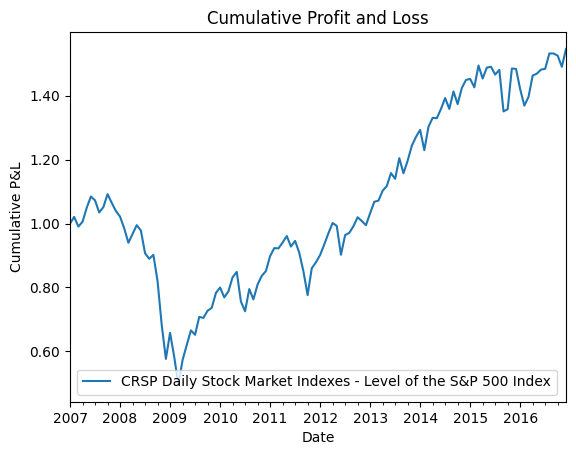

In [15]:
plot_target_index(index_train_data)

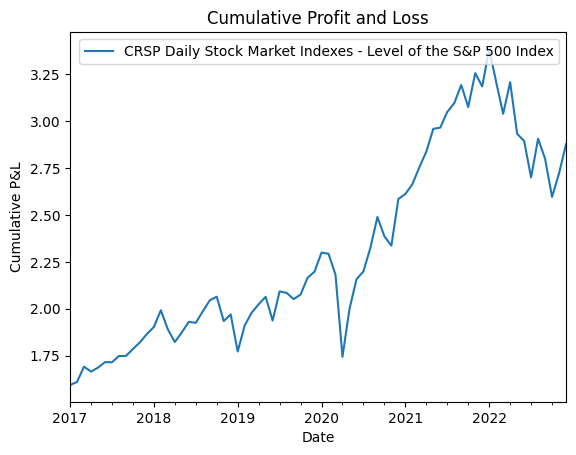

In [16]:
plot_target_index(index_test_data)

In [17]:
train_market_data = train_data.join(index_train_data, how = 'right')
test_market_data = test_data.join(index_test_data, how = 'right')

In [18]:
# Trying different method for feature selection
# 1. Adjust display options to show the full correlation matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_market_data.corr()

,CBOE DJIA Volatility Index,CBOE NASDAQ Volatility Index,CBOE S&P100 Volatility Index,CBOE S&P500 Volatility Index,OptionMetrics - DJI Historical Volatility,OptionMetrics - Russell 2000 Historical Volatility,OptionMetrics - SPX Historical Volatility,OptionMetrics - DJX Index Dividend Yield,OptionMetrics - Russell 2000 Index Dividend Yield,OptionMetrics - SPX Index Dividend Yield,OptionMetrics - Russel 2000 The total contract open interest,OptionMetrics - Russel 2000 Option Volume,OptionMetrics - DJX Option Volume,OptionMetrics - DJX The total contract open interest,OptionMetrics - SPX Option Volume,OptionMetrics - SPX The total contract open interest,OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (CALL),OptionMetrics - DJX Delta of the Option(CALL),OptionMetrics - DJX Implied Volatility of the Option(CALL),OptionMetrics - DJX Interpolated Premium for the Option(CALL),"OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price(CALL)",OptionMetrics - DJX Theta of the Option(CALL),OptionMetrics - DJX VegaKappa of the Option(CALL),OptionMetrics - Zero Coupon Yield Curve,OptionMetrics - DJX Calculated Price for the Underlying Security on the Exp. Date (PUT).xlsx,OptionMetrics - DJX Delta of the Option (PUT),OptionMetrics - DJX Gamma of the Option (PUT),OptionMetrics - DJX Interpolated Premium for the Option (PUT),"OptionMetrics - DJX Strike Price, Currently Always Equal to Forward Price (PUT)",OptionMetrics - DJX Theta of the Option (PUT),OptionMetrics - DJX VegaKappa of the Option (PUT),OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (CALL),OptionMetrics - Russell 2000 Delta of the Option(CALL),OptionMetrics - Russell 2000 Gamma of the Option(CALL),OptionMetrics - Russell 2000 Implied Volatility of the Option(CALL),OptionMetrics - Russell 2000 Interpolated Premium for the Option (CALL),"OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (CALL)",OptionMetrics - Russell 2000 Theta of the Option(CALL),OptionMetrics - Russell 2000 VegaKappa of the Option(CALL),OptionMetrics - Russell 2000 VegaKappa of the Option (PUT),OptionMetrics - Russell 2000 Theta of the Option (PUT),OptionMetrics - Russell 2000 Gamma of the Option (PUT),OptionMetrics - Russell 2000 Delta of the Option (PUT),OptionMetrics - Russell 2000 Implied Volatility of the Option (PUT),OptionMetrics - Russell 2000 Interpolated Premium for the Option (PUT),"OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (PUT)",OptionMetrics - Russell 2000 Calculated Price for the Underlying Security on the Exp. Date (PUT),OptionMetrics - SPX Calculated Price for the Underlying Security on the Exp. Date (CALL),OptionMetrics - SPX Delta of the Option (CALL),OptionMetrics - SPX Gamma of the Option (CALL),OptionMetrics - SPX Implied Volatility of the Option (CALL),OptionMetrics - SPX Interpolated Premium for the Option (CALL),OptionMetrics - SPX Standardized Options (PUT),"OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)",OptionMetrics - SPX Theta of the Option (CALL),OptionMetrics - SPX VegaKappa of the Option (PUT),CRSP Daily Stock Market Indexes - Level of the S&P 500 Index
CBOE DJIA Volatility Index,1.000000,0.962420,0.983334,0.986630,0.000545,-0.069532,-0.011983,-0.139248,-0.141621,-0.124428,-0.178154,-0.150464,-0.130811,-0.225381,-0.043331,-0.159109,0.038287,0.056609,-0.021835,-0.016905,0.097258,-0.095411,-0.029050,-0.020851,0.038287,-0.041937,-0.123316,-0.011750,0.097258,-0.118208,-0.029096,-0.021946,-0.128923,0.061624,-0.076693,-0.156767,0.064902,0.057620,-0.166828,-0.166779,0.093000,0.065700,0.133681,-0.103669,-0.159523,0.064902,-0.021946,0.029311,0.111190,-0.101727,0.107455,0.165545,0.029311,0.093713,-0.104546,0.156774,-0.032132
CBOE NASDAQ Volatility Index,0.962420,1.000000,0.962173,0.970423,-0.049189,-0.092946,-0.064329,-0.123964,-0.135110,-0.111635,-0.175131,-0.171430,-0.147700,-0.189942,-0.06

In [19]:
# 2. Recursive Feature Elimination (RFE) for Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(train_data, index_train_data.values.ravel())
selected_features_rfe = train_data.columns[fit.support_]
print('use RFE')
print("Num Features:", fit.n_features_)
print("Selected Features:", selected_features_rfe)
print("Feature Ranking:", fit.ranking_)

use RFE
Num Features: 5
Selected Features: Index(['OptionMetrics - DJX VegaKappa of the Option(CALL)',
       'OptionMetrics - DJX VegaKappa of the Option (PUT)',
       'OptionMetrics - Russell 2000 Delta of the Option(CALL)',
       'OptionMetrics - Russell 2000 VegaKappa of the Option(CALL)',
       'OptionMetrics - Russell 2000 VegaKappa of the Option (PUT)'],
      dtype='object')
Feature Ranking: [15 22 16 43 24 48 23  8 17  9 36 37 50 35 28 49  4 11 38 25 29 33  1 30
  7 27 41 26 34 42  1 40  1  5 14 47 19 31  1  1 32  6  2 13 46 12 39 10
 21 45 20 52  3 18 44 51]


In [20]:
# 3. Feature Importance from RandomForest
# If it's regression:
forest = RandomForestRegressor(n_estimators=100)
# If it's classification:
# forest = RandomForestClassifier(n_estimators=100)

forest.fit(train_data, index_train_data.values.ravel())
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("RandomForest: Feature ranking:")
for f in range(train_data.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, train_data.columns[indices[f]], importances[indices[f]]))

RandomForest: Feature ranking:
1. Feature OptionMetrics - SPX Delta of the Option (CALL) (0.082532)
2. Feature OptionMetrics - DJX The total contract open interest (0.073424)
3. Feature OptionMetrics - Zero Coupon Yield Curve (0.072442)
4. Feature OptionMetrics - SPX  Index Dividend Yield (0.063872)
5. Feature OptionMetrics - SPX Option Volume (0.035093)
6. Feature OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (CALL) (0.028889)
7. Feature OptionMetrics - Russell 2000  Index Dividend Yield (0.025819)
8. Feature OptionMetrics - SPX The total contract open interest (0.025723)
9. Feature OptionMetrics - DJX Delta of the Option (PUT) (0.025526)
10. Feature OptionMetrics - Russell 2000 Strike Price, Currently Always Equal to Forward Price (PUT) (0.025325)
11. Feature OptionMetrics - DJX Implied Volatility of the Option(CALL) (0.023243)
12. Feature OptionMetrics - Russell 2000 Implied Volatility of the Option (PUT) (0.022676)
13. Feature OptionMetrics - SP

In [22]:
# 4. Univariate Selection using SelectKBest
print('use Univariate Selection using SelectKBest')
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(train_data, index_train_data.values.ravel())
selected_features_skb = train_data.columns[fit.get_support()]
print("Selected Features:", selected_features_skb)

use Univariate Selection using SelectKBest
Selected Features: Index(['OptionMetrics - SPX Interpolated Premium for the Option (CALL)',
       'OptionMetrics - SPX Standardized Options (PUT)',
       'OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)',
       'OptionMetrics - SPX Theta of the Option (CALL)',
       'OptionMetrics - SPX VegaKappa of the Option (PUT)'],
      dtype='object')


In [ ]:
# Temp Decision
1. Moving Average
2. Option Metrics - SPX Strike Price Current Always Equal to Forward Price (CALL)
3. 